<a href="https://colab.research.google.com/github/snehaangeline/Deep-Learning-Algorithms/blob/main/Fashion_MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)


2.4.0


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#metadata
#dataset

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete040UQV/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete040UQV/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [ ]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # normalize operation
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

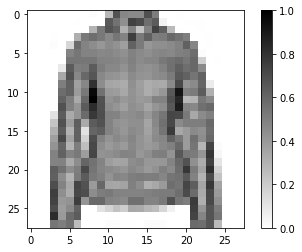

In [ ]:

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Model Building

In [ ]:
100480 +1290

101770

In [ ]:
## Define your model here

l1 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l2 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
l3 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
model = tf.keras.Sequential([l1,l2,l3])

In [ ]:
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential

In [ ]:
cnn_model=tf.keras.Sequential()
cnn_model.add(layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(filters=64,kernel_size=(5,5),activation='softmax'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='softmax'))



cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units=128,activation='softmax'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)              

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
cnn_model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20


ValueError: ignored

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.2780 - accuracy: 0.8998
Accuracy on test dataset: 0.8998000025749207


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape
predictions[0]

array([0.0781145 , 0.08802319, 0.0580977 , 0.16760756, 0.15609145,
       0.14870416, 0.04792653, 0.09115916, 0.06435379, 0.099922  ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
test_labels[0]

4

In [ ]:
class_names[np.argmax(predictions[0])]

'Dress'